In [ ]:
#https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores

In [ ]:
from google.colab import files
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Load dataset dari Google Drive
df = pd.read_csv('/content/drive/My Drive/NetflixOriginals.csv', encoding='latin-1')

# Tampilkan informasi dataset
print(df.info())

# Tampilkan 5 baris pertama
print(df.head())

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None
             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0

**Pembersihan Data**

In [ ]:
print(df.isnull().sum())

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64


In [ ]:
print(df.dtypes)

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object


In [ ]:
df['Premiere'] = pd.to_datetime(df['Premiere'], format='mixed', errors='coerce')

**Analisis Genre Terpopuler**

<ipython-input-8-5edc0afe2871>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="coolwarm")


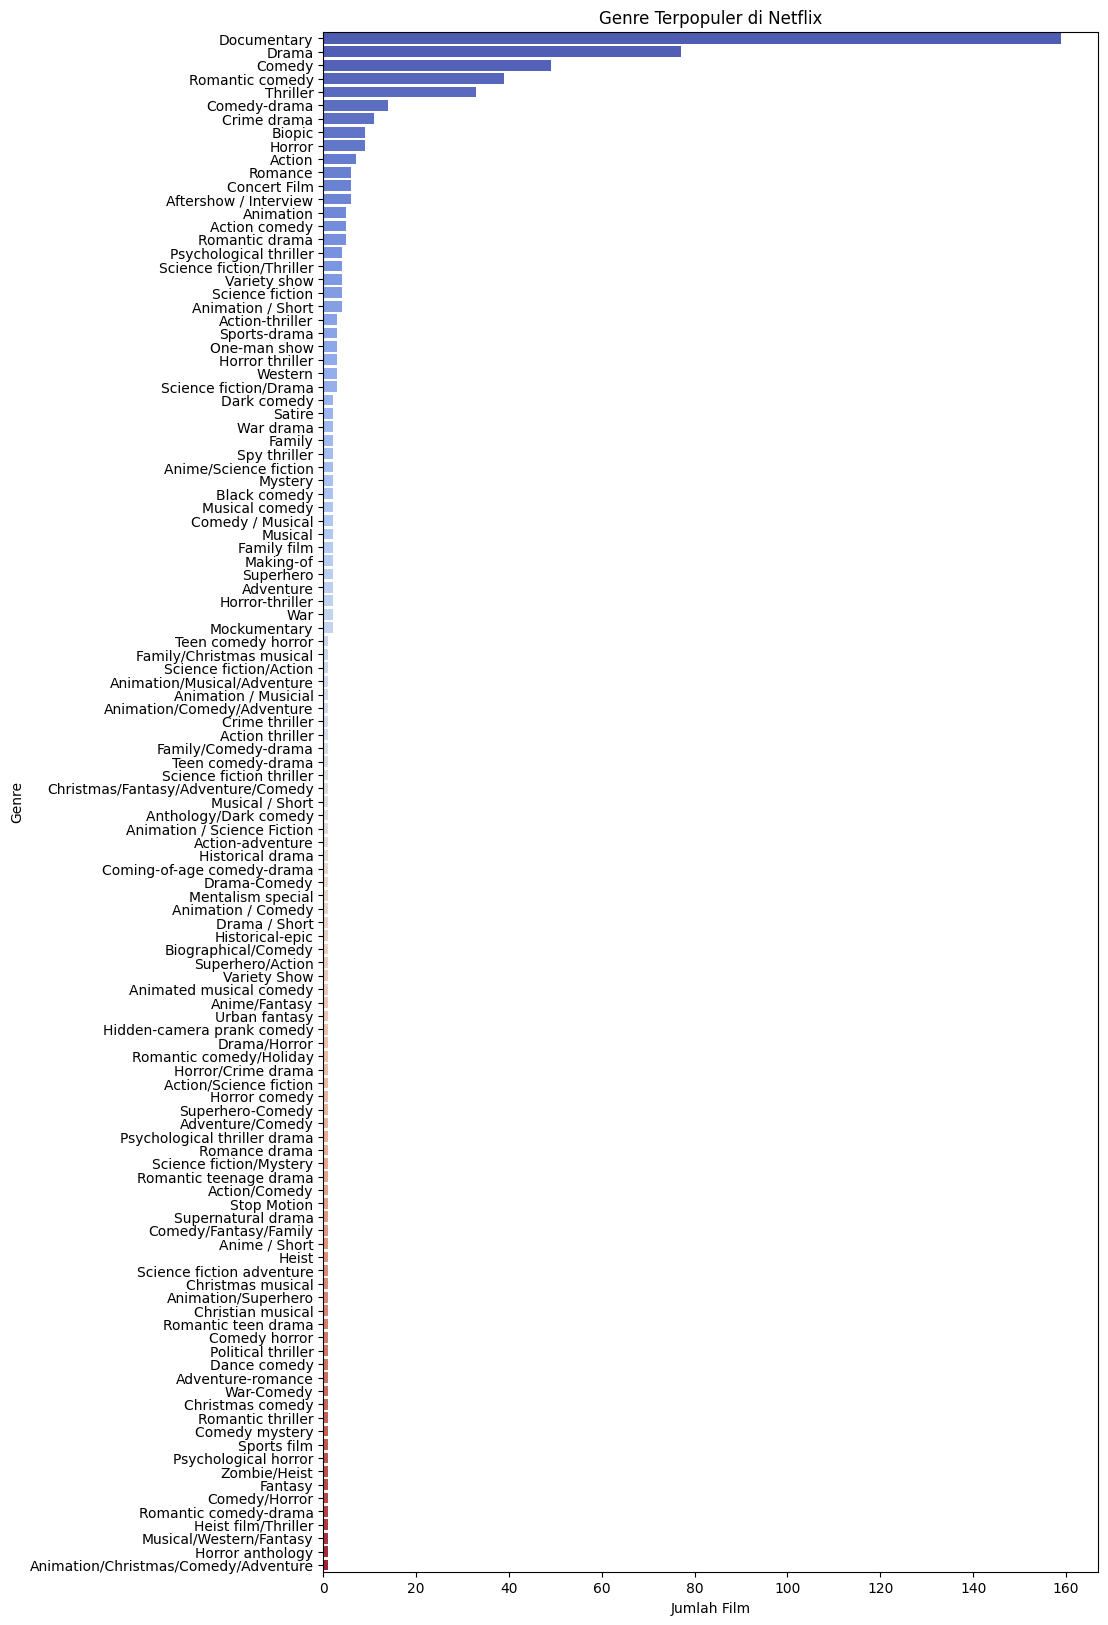

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah film berdasarkan genre
genre_counts = df['Genre'].value_counts()

# Visualisasi
plt.figure(figsize=(10,20))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="coolwarm")
plt.ylabel("Genre")
plt.xlabel("Jumlah Film")
plt.title("Genre Terpopuler di Netflix")
plt.show()

**Analisis Rata-rata IMDB Score per Genre**

<ipython-input-9-153d761b4b2d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_rating.index, x=genre_rating.values, palette="coolwarm")


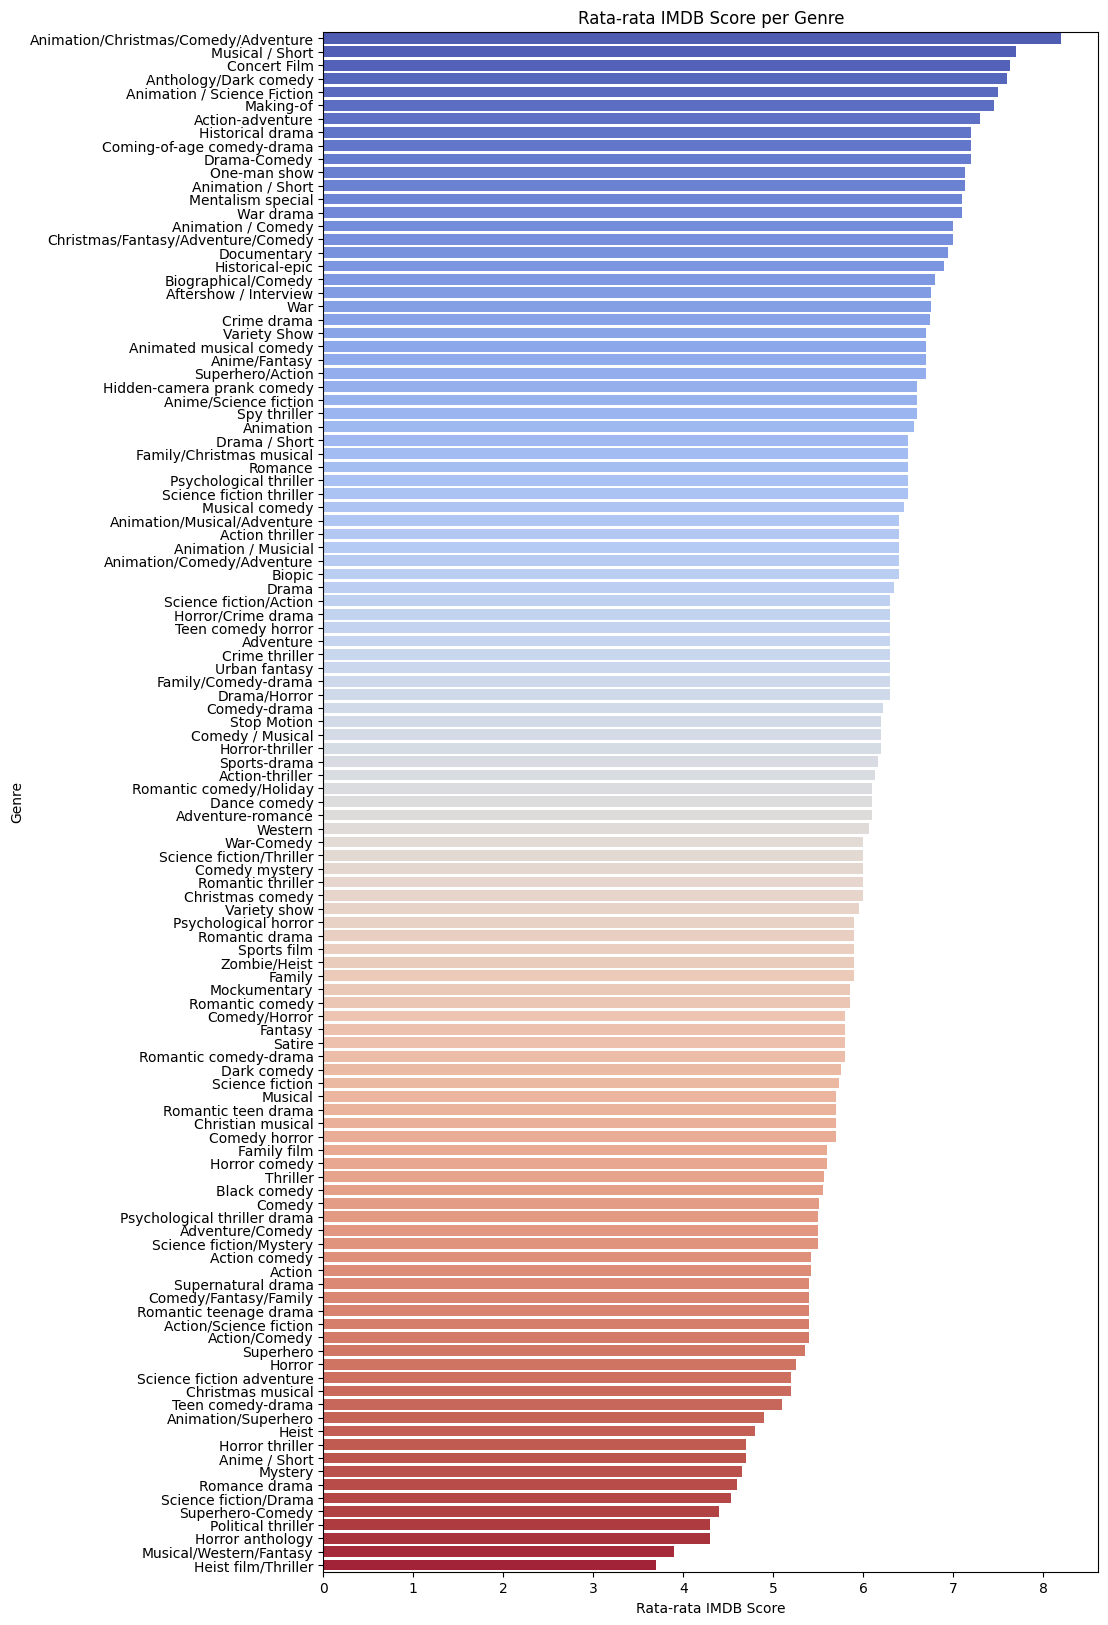

In [ ]:
# Hitung rata-rata rating per genre
genre_rating = df.groupby("Genre")["IMDB Score"].mean().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10, 20))
sns.barplot(y=genre_rating.index, x=genre_rating.values, palette="coolwarm")
plt.ylabel("Genre")
plt.xlabel("Rata-rata IMDB Score")
plt.title("Rata-rata IMDB Score per Genre")
plt.show()

**Analisis Rata-rata Durasi Film per Genre**

<ipython-input-10-2c068d84c8f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_runtime.index, x=genre_runtime.values, palette="coolwarm")


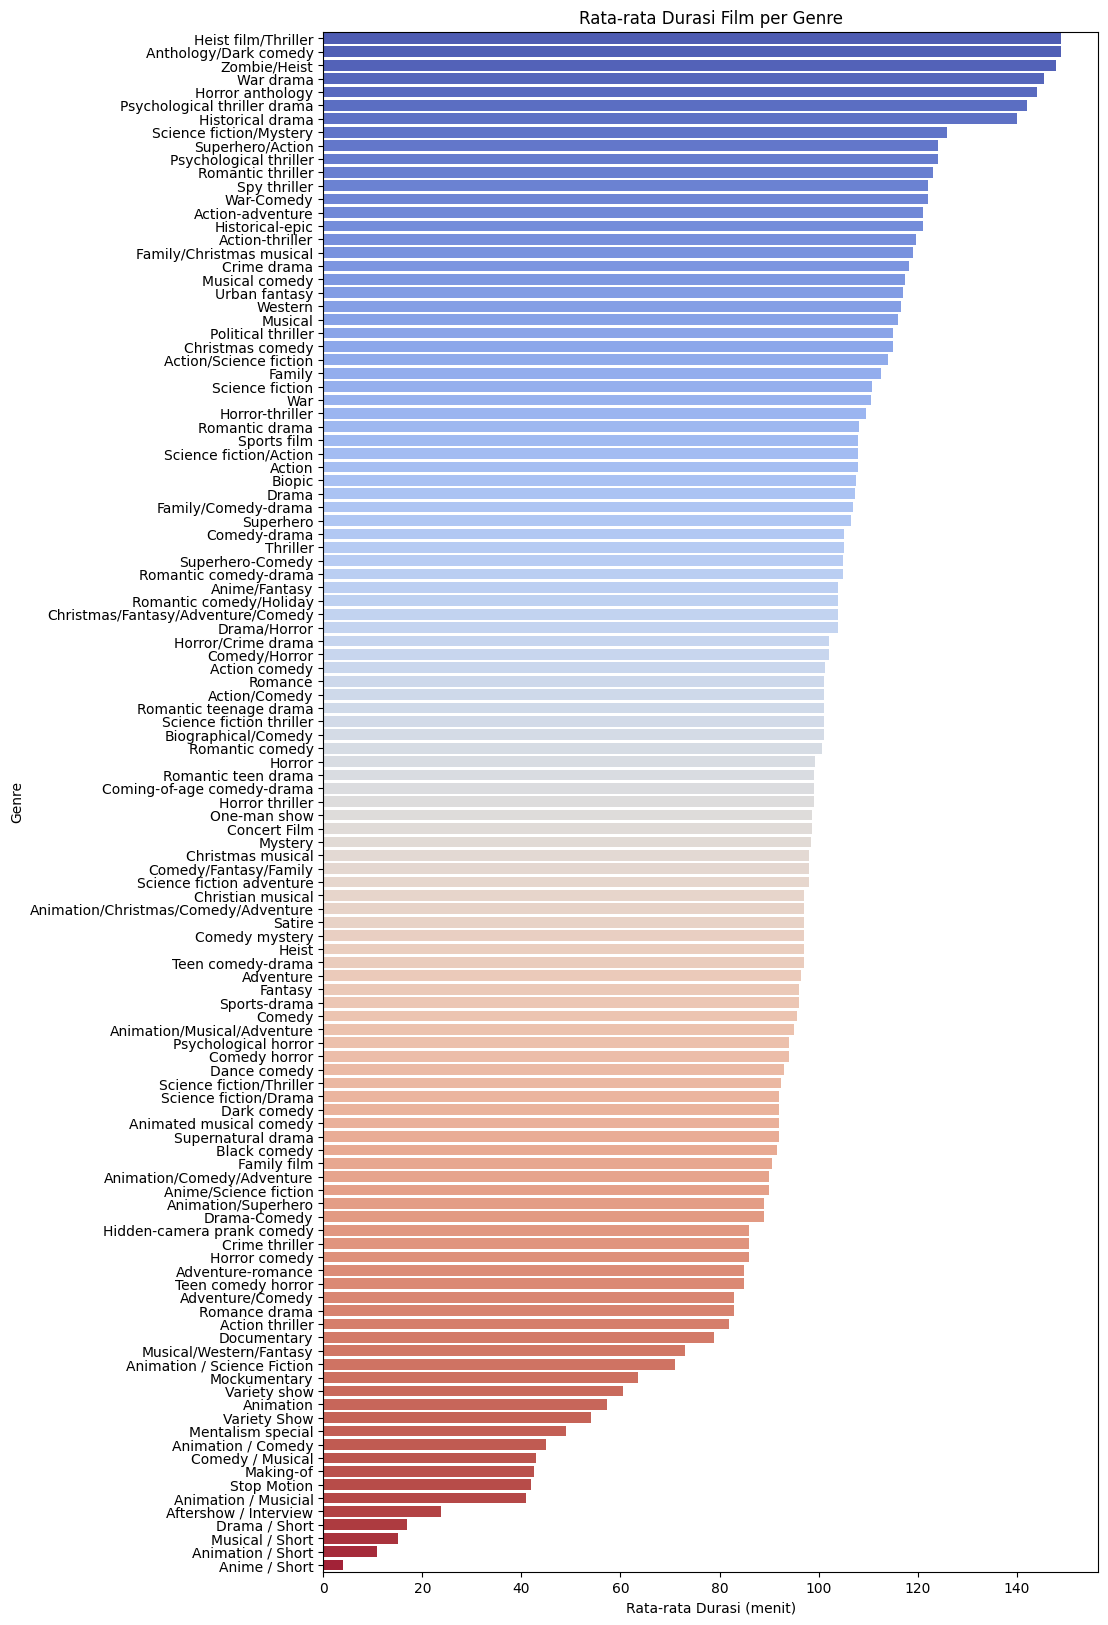

In [ ]:
# Hitung rata-rata durasi film per genre
genre_runtime = df.groupby("Genre")["Runtime"].mean().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10, 20))
sns.barplot(y=genre_runtime.index, x=genre_runtime.values, palette="coolwarm")
plt.ylabel("Genre")
plt.xlabel("Rata-rata Durasi (menit)")
plt.title("Rata-rata Durasi Film per Genre")
plt.show()

**Analisis Rating Berdasarkan Tahun Rilis**

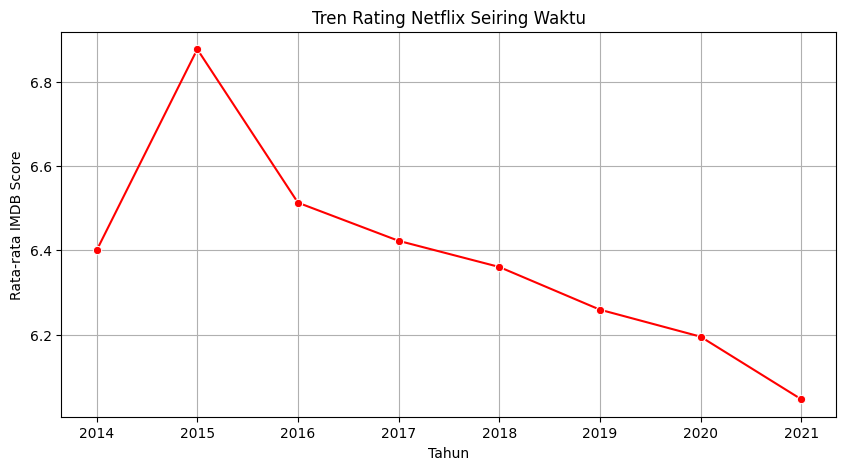

In [ ]:
# Hitung rata-rata rating per tahun
df['Year'] = df['Premiere'].dt.year
yearly_rating = df.groupby('Year')['IMDB Score'].mean()

# Visualisasi
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_rating.index, y=yearly_rating.values, marker="o", color="red")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata IMDB Score")
plt.title("Tren Rating Netflix Seiring Waktu")
plt.grid()
plt.show()

**Analisis Bahasa Film**

<ipython-input-12-4437ae6fef7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="muted")


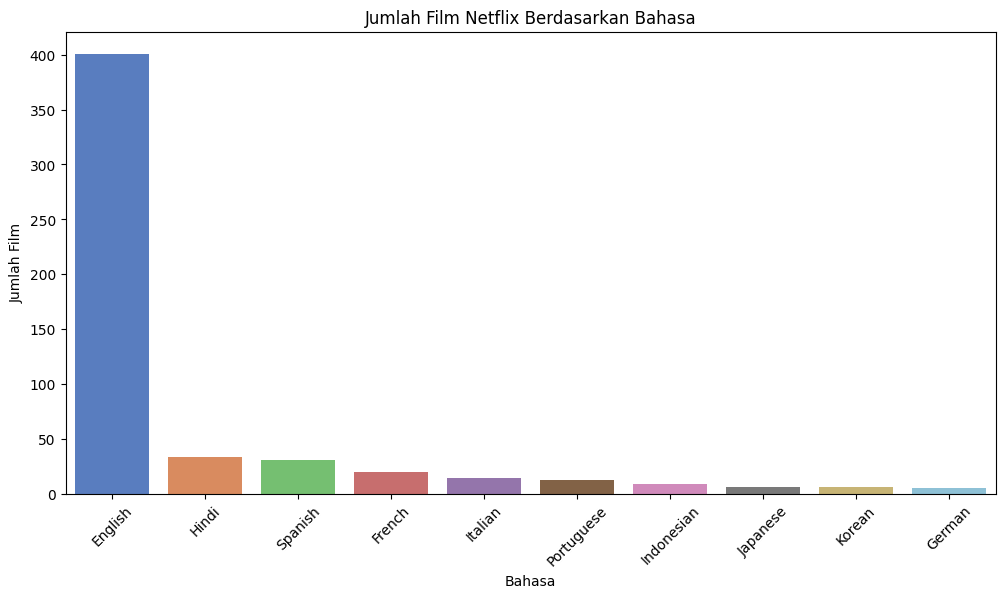

In [ ]:
# Hitung jumlah film berdasarkan bahasa
language_counts = df['Language'].value_counts().head(10)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="muted")
plt.xticks(rotation=45)
plt.xlabel("Bahasa")
plt.ylabel("Jumlah Film")
plt.title("Jumlah Film Netflix Berdasarkan Bahasa")
plt.show()

**Analisis Korelasi Rating dengan Durasi**

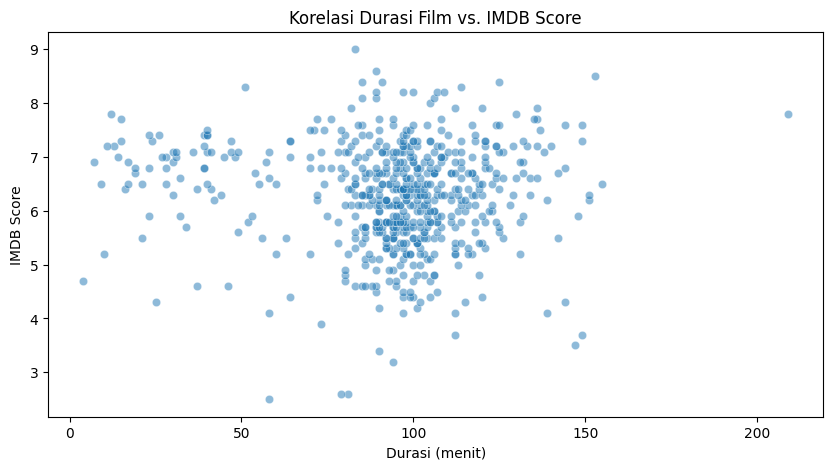

In [ ]:
# Scatter plot hubungan durasi dan rating
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Runtime'], y=df['IMDB Score'], alpha=0.5)
plt.xlabel("Durasi (menit)")
plt.ylabel("IMDB Score")
plt.title("Korelasi Durasi Film vs. IMDB Score")
plt.show()